In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('world_population.csv')
df.head(8)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00


#### 1. FIRST WE ARE GOING TO DO NULL VALUE ANALYSIS

In [9]:
df.isnull().sum()/len(df)*100

Rank                           0.0
CCA3                           0.0
Country                        0.0
Capital                        0.0
Continent                      0.0
2022 Population                0.0
2020 Population                0.0
2015 Population                0.0
2010 Population                0.0
2000 Population                0.0
1990 Population                0.0
1980 Population                0.0
1970 Population                0.0
Area (km²)                     0.0
Density (per km²)              0.0
Growth Rate                    0.0
World Population Percentage    0.0
dtype: float64

Interpretation 1: Hence There are no nullvalues in the data

#### 2. Number of columns and rows and datatypes of the columns

In [10]:
# number of rows and columns
row = df.shape[0]
col = df.shape[1]
print('Number of  the rows in the dataset : ',row)
print('Number of the columns in the dataset : ',col)

Number of  the rows in the dataset :  234
Number of the columns in the dataset :  17


In [11]:
# datatypes of the each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

Interpretation 2 : Each columns' datatype is in accordance with the items columns is showing

###### HENCE FROM INTERPRETATION 1 AND 2 WE DON'T NEED TO DO ANY DATA PREPROCESSING

### EXPLORATORY DATA ANALYSIS OF THE DATASET

In [14]:
# Number of the countries in the dataset with name
print('Number of countries in the dataset : ',df['Country'].nunique())

Number of countries in the dataset :  234


In [19]:
# sorting on the basis of the recent population that is in 2022
df.sort_values(by = '2022 Population',ascending=False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60


<Figure size 1125x750 with 0 Axes>

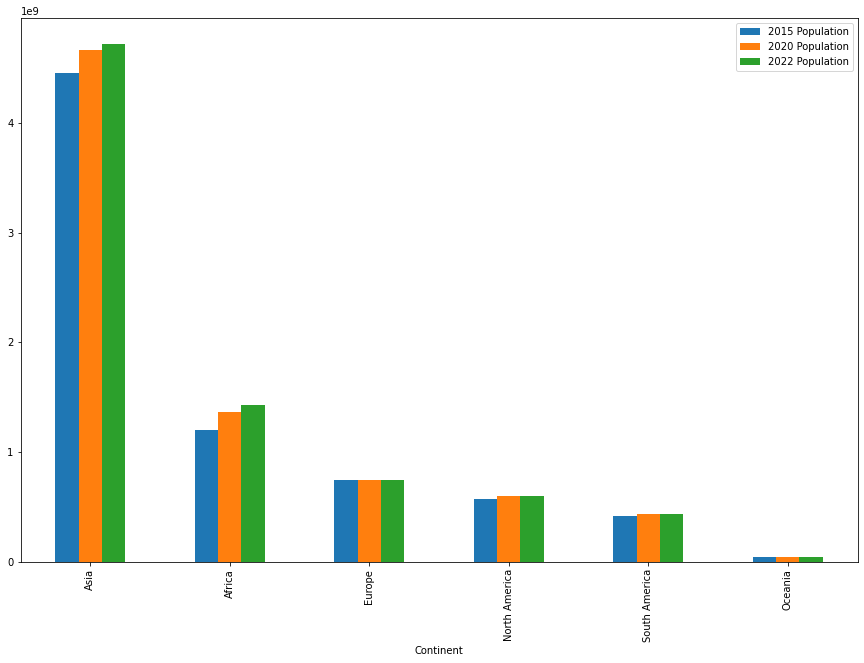

In [69]:
# checking which continent has the highest population
plt.figure(figsize = (15,10),dpi = 75)
pd.pivot_table(data = df,values=['2022 Population','2020 Population','2015 Population'],index = 'Continent',aggfunc=sum).sort_values(by = '2020 Population',ascending=False).plot(kind = 'bar',figsize = (15,10))
plt.show()

INTERPRETATION 3 : ASIA HAS THE HIGHEST POPULATION AND OCEANIA HAS LOWEST POPULATION

<AxesSubplot:xlabel='Continent'>

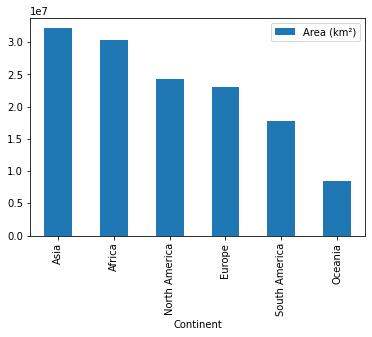

In [71]:
# checking which continents has the higest landmass
pd.pivot_table(data = df,values='Area (km²)',index = 'Continent',aggfunc=sum).sort_values(by = 'Area (km²)',ascending=False).plot(kind = 'bar')

INTERPRETATION 4 : AISA AND AFRICA ARE THE LARGEST CONTINENT BY AREA THEY COVER AND OCEANIA HAS LOWEST LAND AREA COVERAGE

In [73]:
# WHICH CONTINENT HAS THE HIGEST NUMBER OF THE COUNTRIES IN IT
pd.pivot_table(data = df ,values='Country',index='Continent',aggfunc='count')

,Country
Continent,
Africa,57
Asia,50
Europe,50
North America,40
Oceania,23
South America,14


In [78]:
# WHICH COUNTRY CONSITUTES THE WORLD'S 50% POPULATION
pd.pivot_table(data = df,values='World Population Percentage',index = 'Continent',aggfunc='sum').sort_values('World Population Percentage',ascending=False)

,World Population Percentage
Continent,
Asia,59.19
Africa,17.87
Europe,9.33
North America,7.51
South America,5.48
Oceania,0.55


NTERPRETATION 5 : WORLD'S 60% POPULATION LIVE IN ASIA 

In [81]:
# WHICH CONTINENT HAS THE HIGHEST GROWTH
pd.pivot_table(data = df , values='Growth Rate',index = 'Continent',aggfunc='mean').sort_values(by = 'Growth Rate',ascending=False)

,Growth Rate
Continent,
Africa,1.021244
Asia,1.009384
South America,1.007957
Oceania,1.007383
North America,1.004175
Europe,1.002256


INTERPREATION 6 : ALL CONTINENTS ARE SHOWING POSITIVE GROWTH RATE BUT AFRICA HAS THE HIGHEST GROWTH RATE

## FIVE POINT SUMMARY ANALYSIS

In [84]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


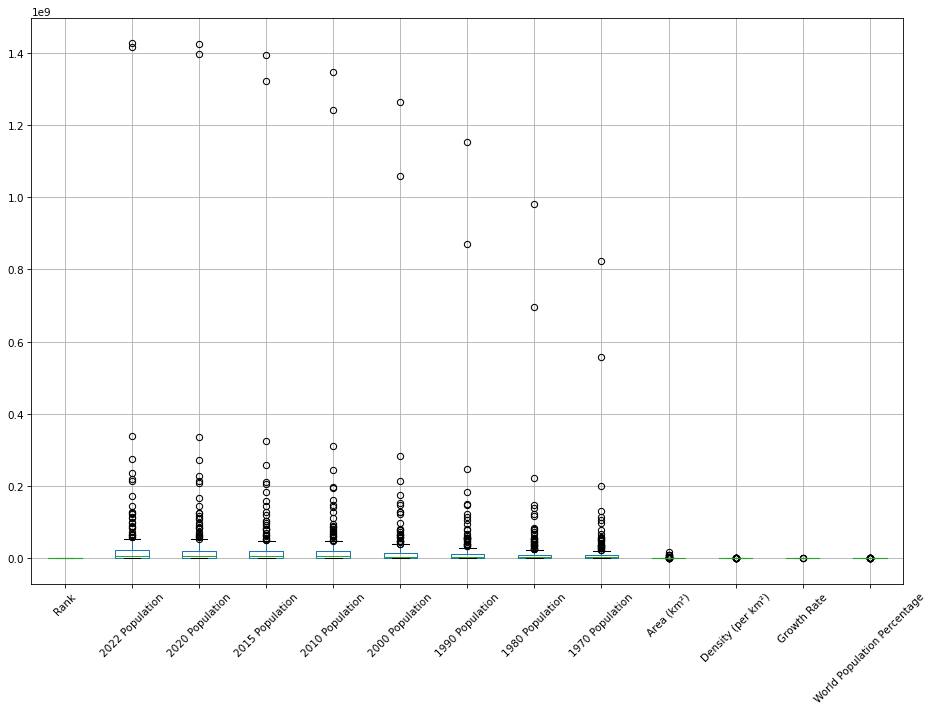

In [86]:
plt.figure(figsize=(15,10),dpi = 75)
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

INTERPREATION 7 : THERE ARE LOT OF OULIERS IN EVERY COLUMNS OF THE DATASET

### FOR BUSINESS PROSPECTIVE

In [89]:
# WE NEED TO SEE THE COUNTRIES WITH HIGEST POPULATION AND POPULATION DENSITY
pd.pivot_table(data =df , values='Density (per km²)',index='Country',aggfunc='sum').sort_values(by = 'Density (per km²)',ascending=False).head(20)

,Density (per km²)
Country,
Macau,23172.2667
Monaco,18234.5000
Singapore,8416.4634
Hong Kong,6783.3922
Gibraltar,5441.5000
Bahrain,1924.4876
Maldives,1745.9567
Malta,1687.6139
Sint Maarten,1299.2647
